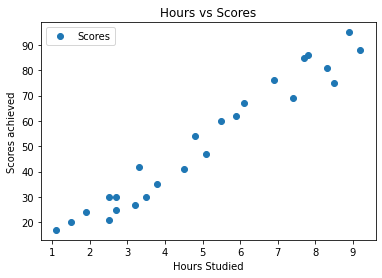

25 20 5
Training done


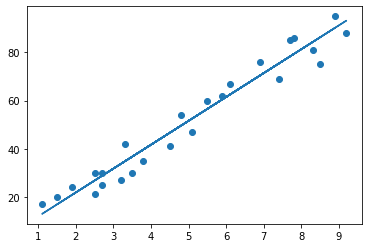

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
number of hours studied: 9.25
scores achieved: [93.69173249]
Mean Absolute Error: 4.183859899002982


In [2]:
# importing the pakages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

dataset = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
dataset.head(10)

dataset.describe() #describing our data on a high level(count and distribution)

dataset.isnull().sum() # will give the missing values

# plotting the 2D graphfor our points

dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores achieved')
plt.show()

# slpitting our data into features (attributes) and labels (what we are predicting)

features = dataset.iloc[:, :-1].values
labels = dataset.iloc[:, 1].values

# dividing our full dataset into training and test dataset(80% and 20% respectively)

x_train ,x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)
print(len(labels), len(y_train), len(y_test )) # checking the divide

# training our model by fitting on the training data

regressor = LinearRegression() #instantiating the model class
regressor.fit(x_train, y_train )
print('Training done')

#prediction on the training data 

train_pred =regressor.predict(x_train)
train_pred

# plotting the regression line

line = regressor.coef_*features+regressor.intercept_
ax = plt.gca()

plt.scatter(features ,labels)
plt.plot(features, line);
plt.show()

# since our model is ready, we shall fit it on test data and predict

print(x_test)
y_pred = regressor.predict(x_test)
y_pred

# compare actual scores with predicted scores

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


# now it's time to predict score(percentage) of a student who studied for 9.25 hrs

hours = 9.25
own_pred = regressor.predict([[hours]]) 
print(f'number of hours studied: {hours}')
print(f'scores achieved: {own_pred}')


# calculating the performance metrics(MAE) on testing data if it's lower than the MAE of naive data(training data), the model is good

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')